Para instalar el paquete rpy2 en linux, deben tener una version de R actualizada (3.02 o superior) y deben ejecutar en la terminal: 'pip3 install rpy2'. Recuerden que si estan en las maquinas del labo deben agregar el flag '--user' despues de la palabra install (para que se instale en su usuario): 'pip3 install --user rpy2'. 

In [1]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

# from rpy2.robjects.packages import importr
# igraph = importr('igraph')
# import pandas as pd
# from rpy2.robjects import r, pandas2ri
# a = pandas2ri.py2ri(nx.to_pandas_adjacency(nxG))

import os
import numpy as np
import rpy2.robjects as robjects

In [2]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)



In [3]:
help(community)

Help on function community in module __main__:

community(nxG, algorithm, fig_name='G')
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.



Text(0.5,1,'Random')

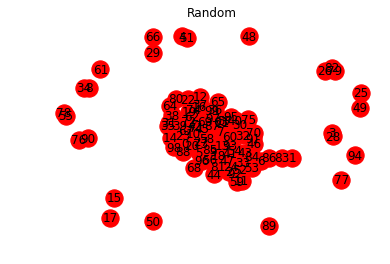

In [4]:
nxG = nx.gnp_random_graph(100, 0.02, seed=None, directed=False)
nxG.name = "Random"

nx.draw_networkx(nxG)
plt.axis("off")
plt.title(nxG.name)

In [5]:
import igraph as igraph
import networkx as nx

def clusterize(nx_Graph, method="infomap"):
    """
    Calcula el agrupamiento en comunidades de un grafo.
    
    In:
        nx_Graph: grafo de networkx
        method: metodo de clustering, puede ser: "infomap", "fastgreedy", "eigenvector", "louvain", "edge_betweenness","label_prop", "walktrap", ""
        
    Out:
        labels_dict: diccionario de nodo : a label al cluster al que pertenece.
    """
    if method == "edge_betweenness":
        nx_Graph = max(nx.connected_component_subgraphs(nx_Graph), key=len)#se queda con la componente más grande.
        print("AVISO: restringiendo a la componente connexa más grade. De otro modo falla el algoritmo de detección de comunidades edge_betweenness.")
    
    isdirected = nx.is_directed(nx_Graph)
    np_adj_list = nx.to_numpy_matrix(nx_Graph)
    g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
    if method=="infomap":
        labels = g.community_infomap(edge_weights="weight").membership
    if method=="label_prop":
        labels = g.community_label_propagation(weights="weight").membership
    if method=="fastgreedy":
        labels = g.community_fastgreedy(weights="weight").as_clustering().membership
    if method=="eigenvector":
        labels = g.community_leading_eigenvector(weights="weight").membership
    if method=="louvain":
        labels = g.community_multilevel(weights="weight").membership
    if method=="edge_betweenness":
        labels = g.community_edge_betweenness(weights="weight", directed=isdirected).as_clustering().membership
    if method=="walktrap":
        labels = g.community_walktrap(weights="weight").as_clustering().membership
    
    label_dict = {node:label for node,label in zip(nx_Graph.nodes(), labels)}
    return label_dict

In [9]:
#labels_infomap = community(nxG, "infomap")
#labels_infomap = community(nxG, "fast_greedy")
#labels_infomap = community(nxG, "edge_betweenness")
#labels_infomap = community(nxG, "louvain")
lab_louvain = clusterize(nxG, "louvain")


In [10]:
lab_louvain

{0: 24,
 1: 18,
 2: 10,
 3: 3,
 4: 9,
 5: 24,
 6: 18,
 7: 19,
 8: 5,
 9: 23,
 10: 13,
 11: 10,
 12: 24,
 13: 18,
 14: 13,
 15: 0,
 16: 25,
 17: 1,
 18: 18,
 19: 25,
 20: 13,
 21: 16,
 22: 16,
 23: 13,
 24: 10,
 25: 2,
 26: 17,
 27: 13,
 28: 3,
 29: 4,
 30: 23,
 31: 16,
 32: 23,
 33: 10,
 34: 5,
 35: 16,
 36: 19,
 37: 24,
 38: 16,
 39: 16,
 40: 16,
 41: 18,
 42: 19,
 43: 10,
 44: 10,
 45: 16,
 46: 23,
 47: 10,
 48: 6,
 49: 7,
 50: 8,
 51: 9,
 52: 10,
 53: 10,
 54: 10,
 55: 15,
 56: 24,
 57: 25,
 58: 16,
 59: 10,
 60: 19,
 61: 11,
 62: 24,
 63: 19,
 64: 16,
 65: 19,
 66: 12,
 67: 24,
 68: 23,
 69: 19,
 70: 23,
 71: 16,
 72: 25,
 73: 23,
 74: 24,
 75: 23,
 76: 21,
 77: 14,
 78: 15,
 79: 17,
 80: 16,
 81: 10,
 82: 17,
 83: 18,
 84: 18,
 85: 13,
 86: 18,
 87: 19,
 88: 13,
 89: 20,
 90: 21,
 91: 23,
 92: 10,
 93: 23,
 94: 22,
 95: 16,
 96: 23,
 97: 19,
 98: 24,
 99: 25}

Les sugerimos implementar el algoritmo para calcular silhuette, pero tambien puede chequear los algoritmos existentes: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html